<a href="https://colab.research.google.com/github/takumi-maker/dmd/blob/main/PLS_ver3_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import statistics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [ ]:
df = pd.read_csv("債券複利データセット3.csv")
df

,Unnamed: 0,GJGC2,GJGC5,GJGC7,GJGC10,GJGC15,GJGC20,GJGC30,GJGC40
0,2021/1/12,-0.128,-0.114,-0.080,0.030,0.242,0.414,0.649,0.666
1,2021/1/13,-0.128,-0.119,-0.084,0.025,0.231,0.405,0.635,0.649
2,2021/1/14,-0.123,-0.104,-0.079,0.030,0.231,0.410,0.643,0.661
3,2021/1/15,-0.129,-0.104,-0.079,0.030,0.226,0.414,0.649,0.670
4,2021/1/18,-0.129,-0.098,-0.069,0.045,0.252,0.438,0.658,0.679
...,...,...,...,...,...,...,...,...,...
1107,2025/7/22,0.751,1.020,1.200,1.500,2.115,2.525,3.022,3.312
1108,2025/7/23,0.830,1.117,1.297,1.585,2.188,2.585,3.061,3.372
1109,2025/7/24,0.846,1.132,1.311,1.594,2.180,2.568,3.034,3.331
1110,2025/7/25,0.856,1.147,1.319,1.594,2.171,2.546,3.006,3.293


In [ ]:
df_1 = pd.read_csv("債券複利データセット3.csv")
df_1 = df_1.drop(df_1.columns[0], axis=1)
columns_len = len(df_1.columns)
length = len(df_1)
length = len(df_1)
newest_list =[[0.845, 1.122, 1.296, 1.577, 2.150, 2.513, 3.004, 3.300]]
new_df = pd.DataFrame(newest_list,columns=["GJGC2","GJGC5","GJGC7","GJGC10","GJGC15","GJGC20","GJGC30","GJGC40"])
new_df
df_1 = pd.concat([df_1, new_df], axis=0)

In [ ]:

df_1["2_5"] = df_1["GJGC5"] - df_1["GJGC2"]
df_1["5_7"] = df_1["GJGC7"] - df_1["GJGC5"]
df_1["7_10"] = df_1["GJGC10"] - df_1["GJGC7"]
df_1["10_15"] = df_1["GJGC15"] - df_1["GJGC10"]
df_1["15_20"] = df_1["GJGC20"] - df_1["GJGC15"]
df_1["20_30"] = df_1["GJGC30"] - df_1["GJGC20"]
df_1["30_40"] = df_1["GJGC40"] - df_1["GJGC30"]
df_1 = df_1.drop('GJGC2',axis=1)
df_1 = df_1.drop('GJGC5',axis=1)
df_1 = df_1.drop('GJGC7',axis=1)
df_1 = df_1.drop('GJGC10',axis=1)
df_1 = df_1.drop('GJGC15',axis=1)
df_1 = df_1.drop('GJGC20',axis=1)
df_1 = df_1.drop('GJGC30',axis=1)
df_1 = df_1.drop('GJGC40',axis=1)
columns_len = len(df_1.columns)
df_1

y_df = df_1["7_10"]
X_df = df_1.drop("7_10", axis=1)

y_df

,7_10
0,0.110
1,0.109
2,0.109
3,0.109
4,0.114
...,...
1108,0.288
1109,0.283
1110,0.275
1111,0.278


In [ ]:
X_df

,2_5,5_7,10_15,15_20,20_30,30_40
0,0.014,0.034,0.212,0.172,0.235,0.017
1,0.009,0.035,0.206,0.174,0.230,0.014
2,0.019,0.025,0.201,0.179,0.233,0.018
3,0.025,0.025,0.196,0.188,0.235,0.021
4,0.031,0.029,0.207,0.186,0.220,0.021
...,...,...,...,...,...,...
1108,0.287,0.180,0.603,0.397,0.476,0.311
1109,0.286,0.179,0.586,0.388,0.466,0.297
1110,0.291,0.172,0.577,0.375,0.460,0.287
1111,0.272,0.169,0.571,0.377,0.467,0.283


In [ ]:
# モデルのインスタンス生成
PLS_model = PLSRegression()
# 探索範囲
param = {
    'n_components' : np.arange(1, len(X_df.columns)+1)
}
# グリッドサーチのインスタンス生成
PLS_grid = GridSearchCV(PLS_model,
                        param_grid=param,
                        cv=10
                       )
# グリッドサーチの実行
PLS_grid.fit(X_df, y_df)
# 最適パラメータ
PLS_grid.best_params_

{'n_components': np.int64(1)}

In [ ]:
  gs_result = pd.DataFrame.from_dict(PLS_grid.cv_results_)

In [ ]:
gs_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007625,0.008462,0.003145,0.000527,1,{'n_components': 1},-44.098651,-8.353562,-2.219279,-10.876530,-8.218656,-0.451274,-15.276636,-6.334905,-8.113981,-1.713770,-10.565724,11.964038,1
1,0.003466,0.001650,0.001873,0.000466,2,{'n_components': 2},-37.473338,-10.372234,0.351060,-7.893927,-4.065366,-2.876171,-47.158774,-3.945945,-59.735902,-1.587002,-17.475760,20.869754,6
2,0.002997,0.000023,0.001695,0.000030,3,{'n_components': 3},-45.290497,-4.815173,-0.104244,-1.494845,-4.570215,0.570078,-16.117277,-3.004988,-44.193218,-3.887983,-12.290836,16.805295,2
3,0.003165,0.000054,0.001693,0.000029,4,{'n_components': 4},-56.573014,-4.588158,-1.324110,-2.578521,-4.486250,0.702136,-12.309634,-2.142768,-44.744371,-5.067101,-13.311179,19.137807,3
4,0.003413,0.000040,0.001763,0.000046,5,{'n_components': 5},-55.938893,-4.488042,-1.385214,-2.843061,-4.432861,0.704287,-11.090709,-2.216964,-47.338432,-5.345804,-13.437569,19.419555,4
5,0.004005,0.000380,0.001924,0.000193,6,{'n_components': 6},-55.875735,-4.482884,-1.380313,-2.854161,-4.730801,0.699475,-11.058210,-2.221469,-48.400618,-5.600247,-13.590496,19.568599,5


100
0.2809999999999999


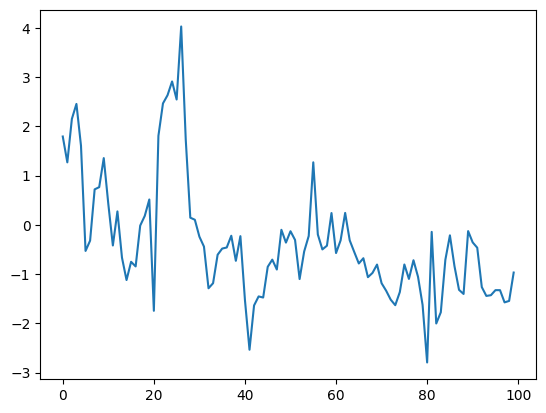

In [ ]:
#閲値1ver
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing

term_flag = 3
magic_num = 90

X_array = X_df.to_numpy()
y_array = y_df.to_numpy()

#print(X_array)
#print(y_array)

for i in range(1,2):

  total_num = 100*i
  print(total_num)

  s_list = []
  coef_list = []
  total_list = []
  res_list = []
  res_list2 = []
  return_list = []
  return_list2 = []
  result_list = []


  for j in range(total_num):
    total_list.append(list(X_array[len(X_df)-1-j]))
  #print(len(total_list))

  for i in range(magic_num-1,len(X_array)):
    #print("i:",i)
    if i <= len(X_array)-1-total_num:
      continue
    #print("i:",i)
    #print(y_log[len(y_log)-1])
    X_return_list = []
    y_return_list = []


    for j in range(magic_num):
      X_return_list.append(list(X_array[i-j]))
      y_return_list.append(y_array[i-j])


    X_test = X_array[i].reshape(1, -1)
    #print(X_test)
    y_test = y_array[i]
    #print(X_pred)
    X_list2 = list(reversed(X_return_list))
    y_list2 = list(reversed(y_return_list))

    #print("X_list:",X_list2)
    #print("y_list:",y_list2)

    PLS_model = PLSRegression(n_components=2)

    PLS_model.fit(X_list2, y_list2)
    #X_pred = PLS_model.predict(X_test)
    #res_score = y_test - X_pred
    #res_list.append(res_score)
    #ss = preprocessing.StandardScaler()
    #res_std_list = ss.fit_transform(res_list)

    X_pred = PLS_model.predict(X_list2)
    res_score = y_list2 - X_pred
    res_score = res_score.reshape(-1, 1)

    #print(res_score)
    ss = preprocessing.StandardScaler()
    res_score_std_list = ss.fit_transform(res_score)
    res_list.append(res_score_std_list[len(res_score_std_list)-1])
    return_list.append(y_list2[len(y_list2)-1])
    if i == len(X_array)-1:
      print(res_score_std_list[len(res_score_std_list)-1])




  plt.plot(res_list)
  plt.show()



<>:165: SyntaxWarning: invalid decimal literal
<>:165: SyntaxWarning: invalid decimal literal
<ipython-input-26-a8e4917f4018>:165: SyntaxWarning: invalid decimal literal
  if res_score>2.0or res_score<-2.0:#変えるパラメータ


100


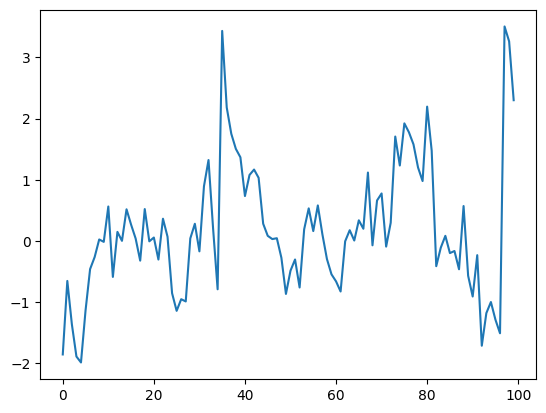

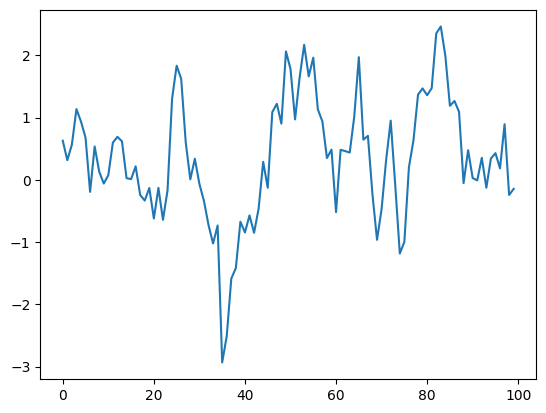

100
100
100
100
found_num: 1
SharpRatio: inf
0.028000000000000143
200


<ipython-input-26-a8e4917f4018>:182: RuntimeWarning: divide by zero encountered in scalar divide
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))


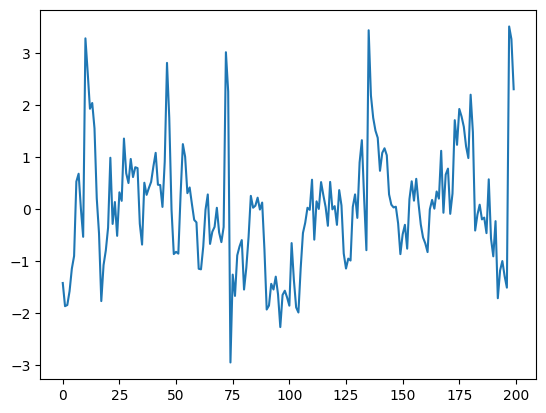

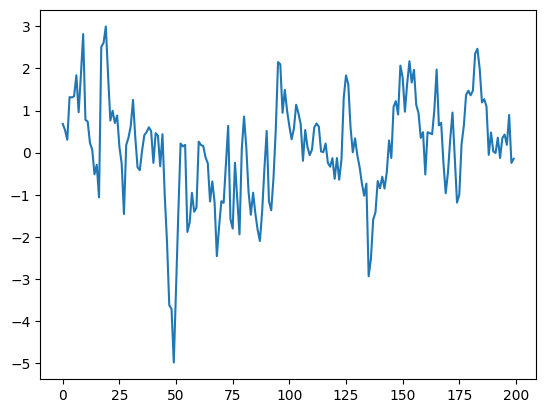

200
200
200
200
found_num: 3
SharpRatio: 2.9025188000451325
0.0740000000000001
300


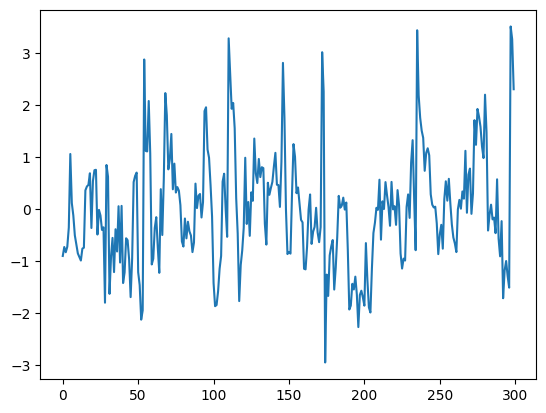

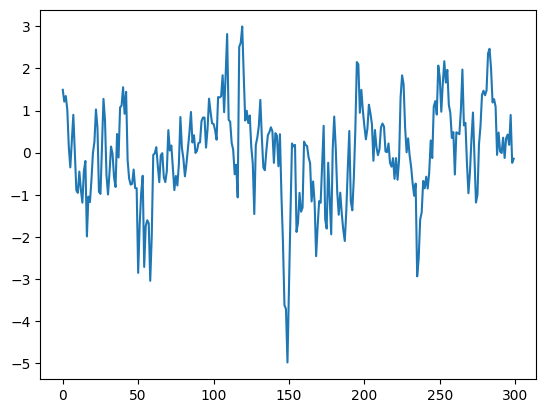

300
300
300
300
found_num: 4
SharpRatio: 2.6278967493408376
0.089
400


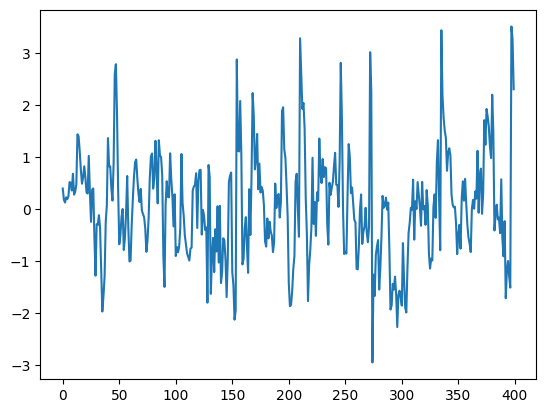

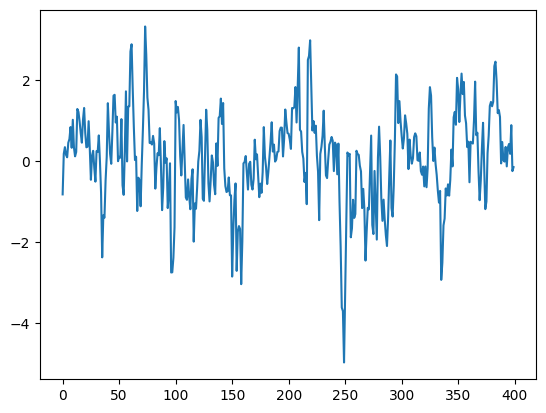

400
400
400
400
found_num: 4
SharpRatio: 2.6278967493408376
0.089
500


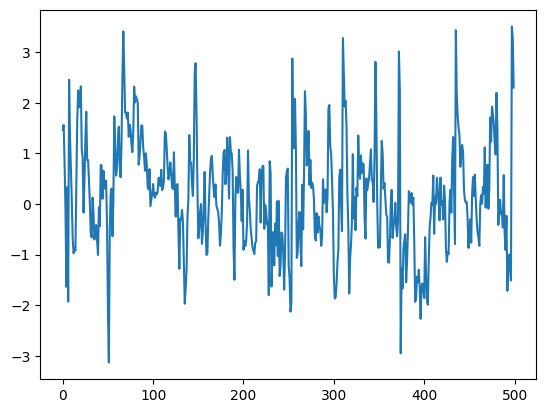

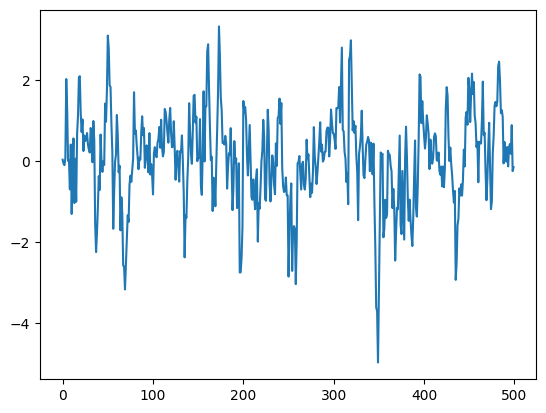

500
500
500
500
found_num: 6
SharpRatio: 1.444139783700873
0.12800000000000009
600


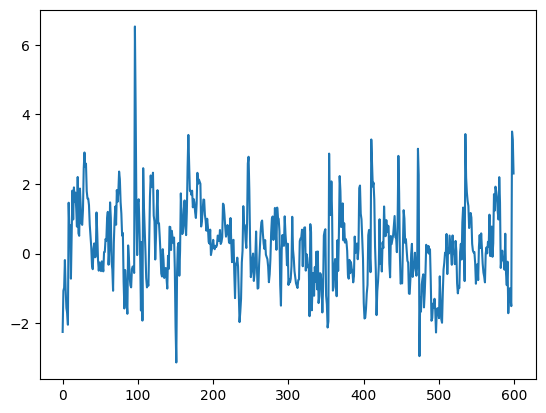

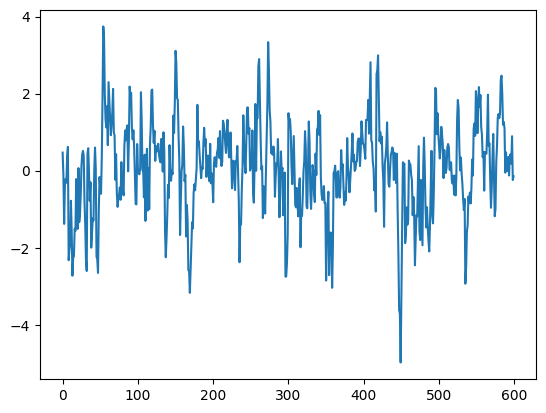

600
600
600
600
found_num: 7
SharpRatio: 0.7177071462276661
0.337
700


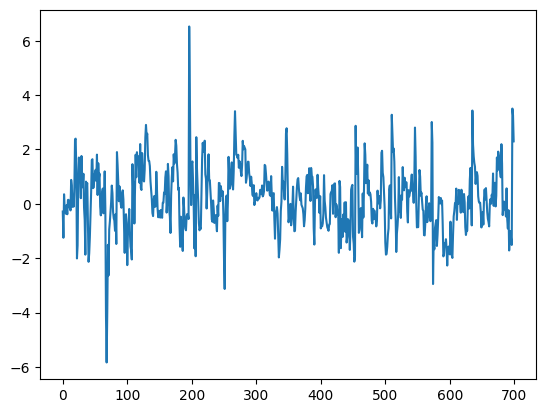

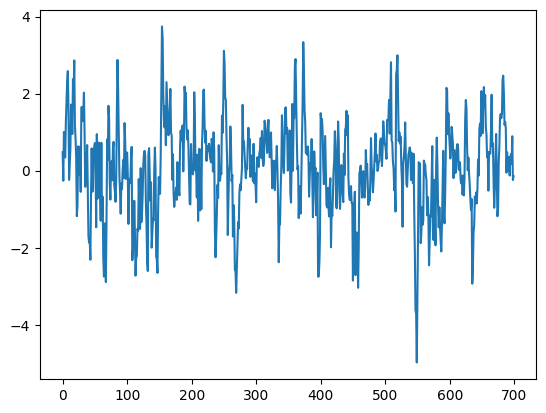

700
700
700
700
found_num: 7
SharpRatio: 0.7177071462276661
0.337


In [ ]:
#閲値2ver
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing

term_flag = 3
magic_num = 90

X_array = X_df.to_numpy()
y_array = y_df.to_numpy()
X_array2 = X_df2.to_numpy()
y_array2 = y_df2.to_numpy()
#print(X_array)
#print(y_array)

for i in range(1,8):

  total_num = 100*i
  print(total_num)

  s_list = []
  coef_list = []
  total_list = []
  res_list = []
  res_list2 = []
  return_list = []
  return_list2 = []
  result_list = []


  for j in range(total_num):
    total_list.append(list(X_array[len(X_df)-1-j]))
  #print(len(total_list))

  for i in range(magic_num-1,len(X_array)):
    #print("i:",i)
    if i <= len(X_array)-1-total_num:
      continue
    #print("i:",i)
    #print(y_log[len(y_log)-1])
    X_return_list = []
    y_return_list = []
    X_return_list2 = []
    y_return_list2 = []

    for j in range(magic_num):
      X_return_list.append(list(X_array[i-j]))
      y_return_list.append(y_array[i-j])
      X_return_list2.append(list(X_array2[i-j]))
      y_return_list2.append(y_array2[i-j])

    X_test = X_array[i].reshape(1, -1)
    #print(X_test)
    y_test = y_array[i]
    #print(X_pred)
    X_list2 = list(reversed(X_return_list))
    y_list2 = list(reversed(y_return_list))
    X_list2_2 = list(reversed(X_return_list2))
    y_list2_2 = list(reversed(y_return_list2))
    #print("X_list:",X_list2)
    #print("y_list:",y_list2)

    PLS_model = PLSRegression(n_components=7)

    PLS_model.fit(X_list2, y_list2)
    #X_pred = PLS_model.predict(X_test)
    #res_score = y_test - X_pred
    #res_list.append(res_score)
    #ss = preprocessing.StandardScaler()
    #res_std_list = ss.fit_transform(res_list)

    X_pred = PLS_model.predict(X_list2)
    res_score = y_list2 - X_pred
    res_score = res_score.reshape(-1, 1)

    #print(res_score)
    ss = preprocessing.StandardScaler()
    res_score_std_list = ss.fit_transform(res_score)
    res_list.append(res_score_std_list[len(res_score_std_list)-1])
    return_list.append(y_list2[len(y_list2)-1])
#モデル二つ目の部分
    PLS_model = PLSRegression(n_components=7)

    PLS_model.fit(X_list2_2, y_list2_2)
    #X_pred = PLS_model.predict(X_test)
    #res_score = y_test - X_pred
    #res_list.append(res_score)
    #ss = preprocessing.StandardScaler()
    #res_std_list = ss.fit_transform(res_list)

    X_pred_2 = PLS_model.predict(X_list2_2)
    res_score_2 = y_list2_2 - X_pred_2
    res_score_2 = res_score_2.reshape(-1, 1)

    #print(res_score)
    ss = preprocessing.StandardScaler()
    res_score_std_list_2 = ss.fit_transform(res_score_2)
    res_list2.append(res_score_std_list_2[len(res_score_std_list_2)-1])
    return_list2.append(y_list2_2[len(y_list2_2)-1])



  plt.plot(res_list)
  plt.show()
  plt.plot(res_list2)
  plt.show()
  print(len(res_list))
  print(len(return_list))
  print(len(res_list2))
  print(len(return_list2))

  open_flag = 0
  open_data = 0
  close_data = 0
  open_flag2 = 0
  open_data2 = 0
  close_data2 = 0
  found_num = 0
  for j in range(len(return_list)):
    res_score = res_list[j]
    return_ = return_list[j]
    res_score2 = res_list2[j]
    return_2 = return_list2[j]
    #print(res_score)
    #print(return_)


    if open_flag == -1 and open_flag2 == 1 :
      if res_score<=-1.0 and res_score2>0:#変えるパラメータ
        close_data = return_
        close_data2 = return_2
        result_return = (close_data - open_data)*open_flag+(close_data2 - open_data2)*open_flag2-0.01
        result_list.append(result_return)
        found_num +=1
        open_flag = 0
        open_flag2 = 0
      if res_score<=0 and res_score2>1.0:#変えるパラメータ
        close_data = return_
        close_data2 = return_2
        result_return = (close_data - open_data)*open_flag+(close_data2 - open_data2)*open_flag2-0.01
        result_list.append(result_return)
        found_num +=1
        open_flag = 0
        open_flag2 = 0
    if open_flag == 1 and open_flag2 == -1 :
      if res_score>1.0 and res_score2<=0:#変えるパラメータ
        close_data = return_
        close_data2 = return_2
        result_return = (close_data - open_data)*open_flag+(close_data2 - open_data2)*open_flag2-0.01
        result_list.append(result_return)
        found_num +=1
        open_flag = 0
        open_flag2 = 0
      if res_score>0 and res_score2<=-1.0:#変えるパラメータ
        close_data = return_
        close_data2 = return_2
        result_return = (close_data - open_data)*open_flag+(close_data2 - open_data2)*open_flag2-0.01
        result_list.append(result_return)
        found_num +=1
        open_flag = 0
        open_flag2 = 0

    if res_score>2.0or res_score<-2.0:#変えるパラメータ
      if res_score2>2.0 or res_score2<-2.0:

        if res_score>0 and res_score2<=0:
          if open_flag == 0 and open_flag2 == 0 :
            open_flag = -1
            open_flag2 = 1
            open_data = return_
            open_data2 = return_2
        if res_score<=0 and res_score2>0:
          if open_flag == 0 and open_flag2 == 0 :
            open_flag = 1
            open_flag2 = -1
            open_data = return_
            open_data2 = return_2
  print("found_num:",found_num)
  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)

<>:146: SyntaxWarning: invalid decimal literal
<>:146: SyntaxWarning: invalid decimal literal
<ipython-input-197-3ceee6fee947>:146: SyntaxWarning: invalid decimal literal
  if res_score>1.5or res_score<-1.5:#変えるパラメータ


100


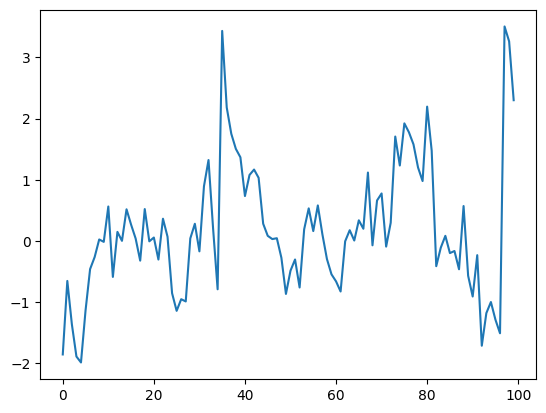

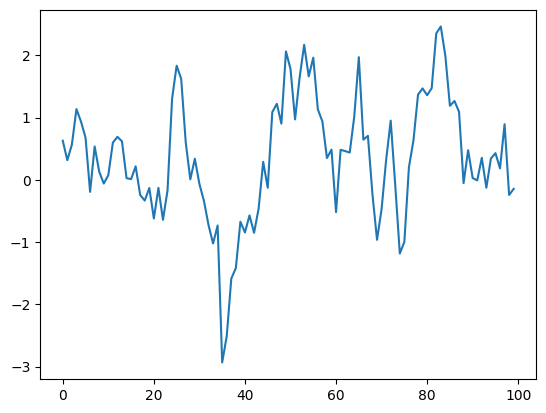

100
100
100
100
SharpRatio: -inf
-0.0009999999999999966
200


<ipython-input-197-3ceee6fee947>:162: RuntimeWarning: divide by zero encountered in scalar divide
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))


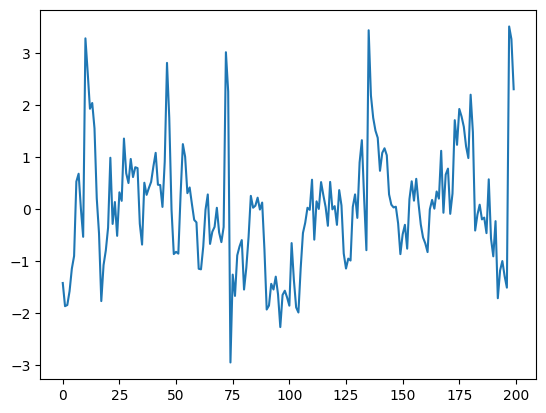

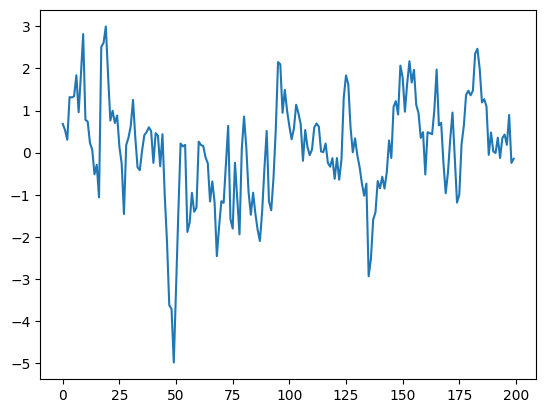

200
200
200
200
SharpRatio: -0.22573305919324377
-0.008000000000000103
300


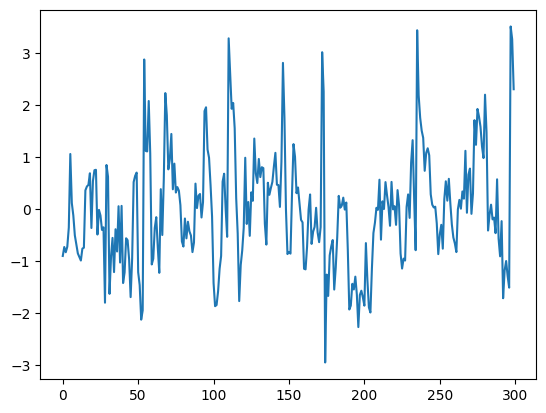

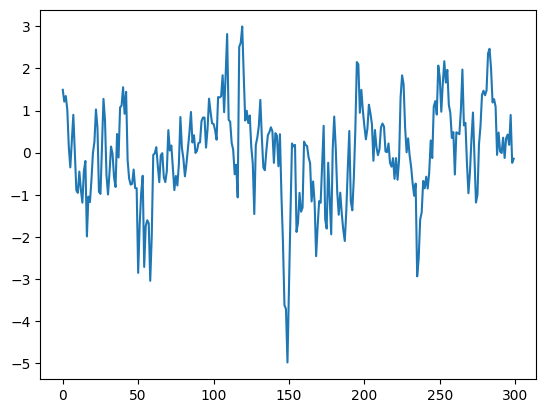

300
300
300
300
SharpRatio: 0.20266338404683082
0.011999999999999806
400


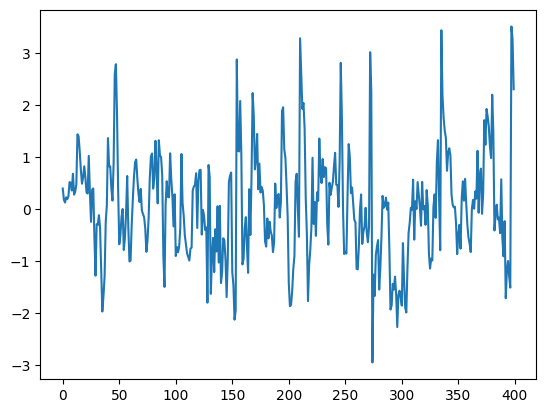

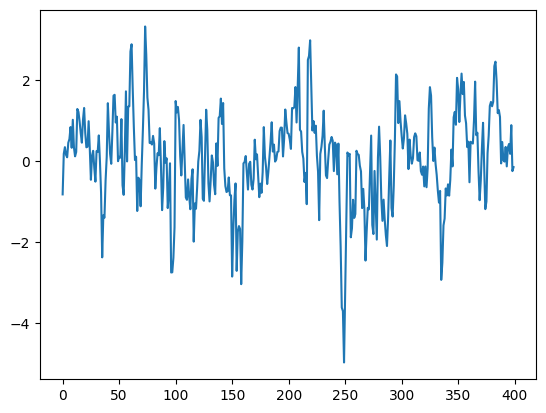

400
400
400
400
SharpRatio: 0.20266338404683082
0.011999999999999806
500


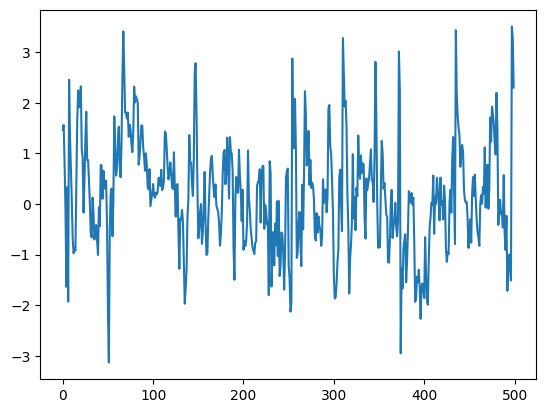

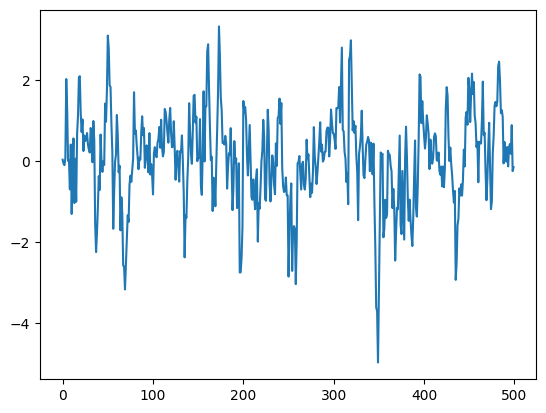

500
500
500
500
SharpRatio: 0.24572079008695447
0.03899999999999991
600


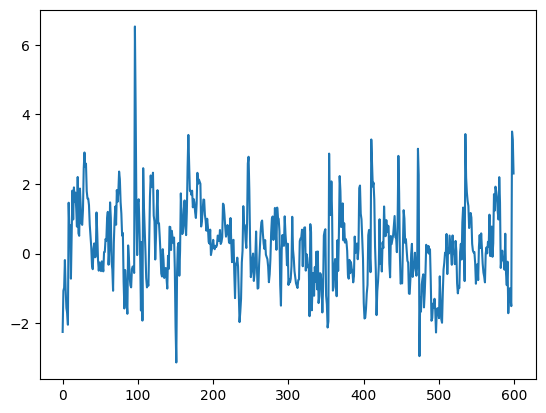

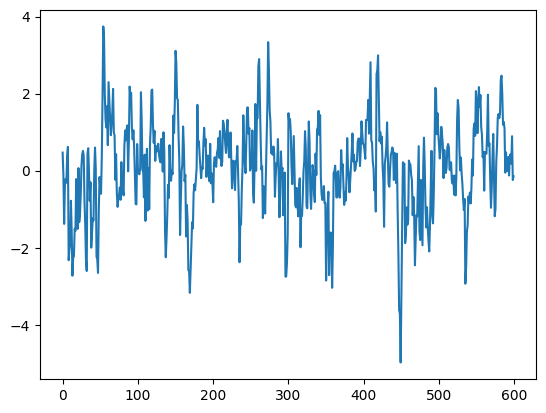

600
600
600
600
SharpRatio: 0.5350364831725123
0.1349999999999999
700


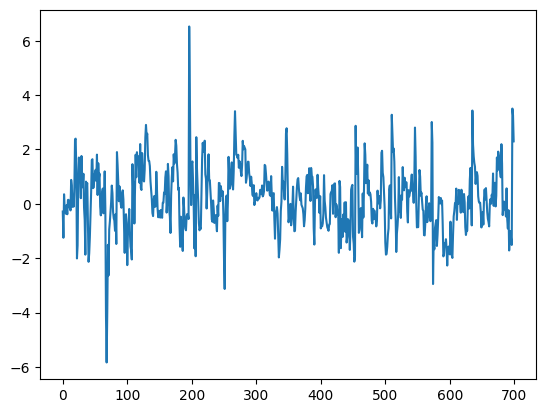

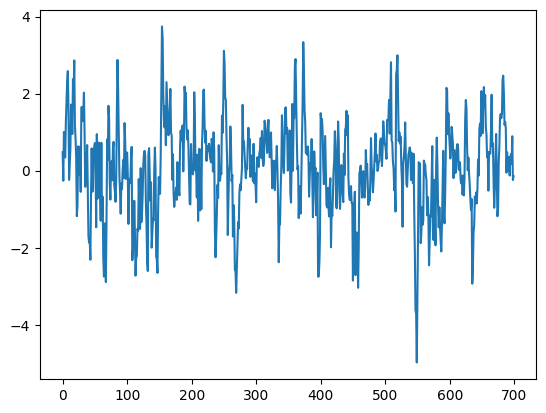

700
700
700
700
SharpRatio: 0.3879312803987045
0.11199999999999988


In [ ]:
#閲値1.5ver
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing

term_flag = 3
magic_num = 90

X_array = X_df.to_numpy()
y_array = y_df.to_numpy()
X_array2 = X_df2.to_numpy()
y_array2 = y_df2.to_numpy()
#print(X_array)
#print(y_array)

for i in range(1,8):

  total_num = 100*i
  print(total_num)

  s_list = []
  coef_list = []
  total_list = []
  res_list = []
  res_list2 = []
  return_list = []
  return_list2 = []
  result_list = []


  for j in range(total_num):
    total_list.append(list(X_array[len(X_df)-1-j]))
  #print(len(total_list))

  for i in range(magic_num-1,len(X_array)):
    #print("i:",i)
    if i <= len(X_array)-1-total_num:
      continue
    #print("i:",i)
    #print(y_log[len(y_log)-1])
    X_return_list = []
    y_return_list = []
    X_return_list2 = []
    y_return_list2 = []

    for j in range(magic_num):
      X_return_list.append(list(X_array[i-j]))
      y_return_list.append(y_array[i-j])
      X_return_list2.append(list(X_array2[i-j]))
      y_return_list2.append(y_array2[i-j])

    X_test = X_array[i].reshape(1, -1)
    #print(X_test)
    y_test = y_array[i]
    #print(X_pred)
    X_list2 = list(reversed(X_return_list))
    y_list2 = list(reversed(y_return_list))
    X_list2_2 = list(reversed(X_return_list2))
    y_list2_2 = list(reversed(y_return_list2))
    #print("X_list:",X_list2)
    #print("y_list:",y_list2)

    PLS_model = PLSRegression(n_components=7)

    PLS_model.fit(X_list2, y_list2)
    #X_pred = PLS_model.predict(X_test)
    #res_score = y_test - X_pred
    #res_list.append(res_score)
    #ss = preprocessing.StandardScaler()
    #res_std_list = ss.fit_transform(res_list)

    X_pred = PLS_model.predict(X_list2)
    res_score = y_list2 - X_pred
    res_score = res_score.reshape(-1, 1)

    #print(res_score)
    ss = preprocessing.StandardScaler()
    res_score_std_list = ss.fit_transform(res_score)
    res_list.append(res_score_std_list[len(res_score_std_list)-1])
    return_list.append(y_list2[len(y_list2)-1])
#モデル二つ目の部分
    PLS_model = PLSRegression(n_components=7)

    PLS_model.fit(X_list2_2, y_list2_2)
    #X_pred = PLS_model.predict(X_test)
    #res_score = y_test - X_pred
    #res_list.append(res_score)
    #ss = preprocessing.StandardScaler()
    #res_std_list = ss.fit_transform(res_list)

    X_pred_2 = PLS_model.predict(X_list2_2)
    res_score_2 = y_list2_2 - X_pred_2
    res_score_2 = res_score_2.reshape(-1, 1)

    #print(res_score)
    ss = preprocessing.StandardScaler()
    res_score_std_list_2 = ss.fit_transform(res_score_2)
    res_list2.append(res_score_std_list_2[len(res_score_std_list_2)-1])
    return_list2.append(y_list2_2[len(y_list2_2)-1])



  plt.plot(res_list)
  plt.show()
  plt.plot(res_list2)
  plt.show()
  print(len(res_list))
  print(len(return_list))
  print(len(res_list2))
  print(len(return_list2))

  open_flag = 0
  open_data = 0
  close_data = 0
  open_flag2 = 0
  open_data2 = 0
  close_data2 = 0
  for j in range(len(return_list)):
    res_score = res_list[j]
    return_ = return_list[j]
    res_score2 = res_list2[j]
    return_2 = return_list2[j]
    #print(res_score)
    #print(return_)


    if open_flag == -1 and open_flag2 == 1 :
      if res_score<=0 or res_score2>0:#変えるパラメータ
        close_data = return_
        close_data2 = return_2
        result_return = (close_data - open_data)*open_flag+(close_data2 - open_data2)*open_flag2-0.005
        result_list.append(result_return)
        open_flag = 0
        open_flag2 = 0
    if open_flag == 1 and open_flag2 == -1 :
      if res_score>0 or res_score2<=0:#変えるパラメータ
        close_data = return_
        close_data2 = return_2
        result_return = (close_data - open_data)*open_flag+(close_data2 - open_data2)*open_flag2-0.005
        result_list.append(result_return)
        open_flag = 0
        open_flag2 = 0

    if res_score>1.5or res_score<-1.5:#変えるパラメータ
      if res_score2>1.5 or res_score2<-1.5:
        if res_score>0 and res_score2<=0:
          if open_flag == 0 and open_flag2 == 0 :
            open_flag = -1
            open_flag2 = 1
            open_data = return_
            open_data2 = return_2
        if res_score<=0 and res_score2>0:
          if open_flag == 0 and open_flag2 == 0 :
            open_flag = 1
            open_flag2 = -1
            open_data = return_
            open_data2 = return_2

  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)

100


<>:146: SyntaxWarning: invalid decimal literal
<>:146: SyntaxWarning: invalid decimal literal
<ipython-input-198-2ca8634816b6>:146: SyntaxWarning: invalid decimal literal
  if res_score>2.0or res_score<-2.0:#変えるパラメータ


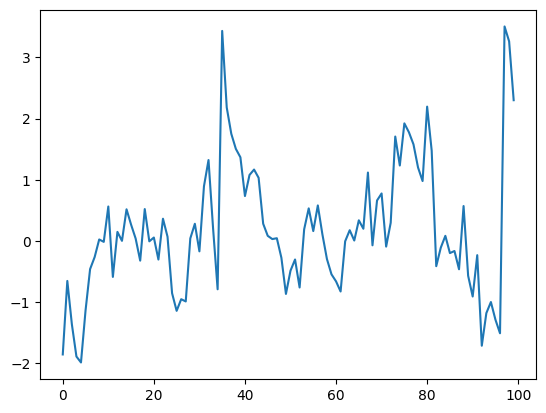

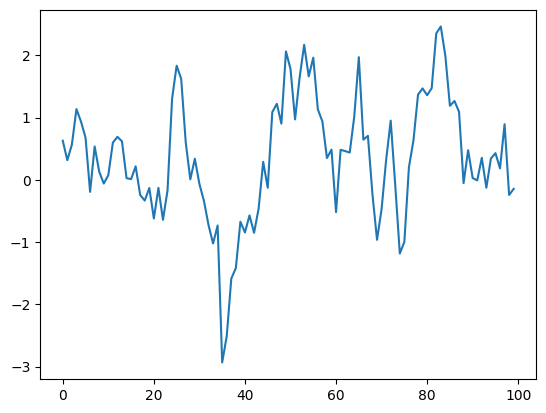

100
100
100
100
SharpRatio: -inf
-0.0009999999999999966
200


<ipython-input-198-2ca8634816b6>:162: RuntimeWarning: divide by zero encountered in scalar divide
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))


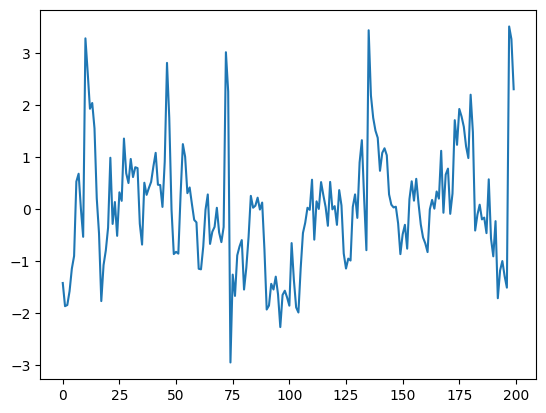

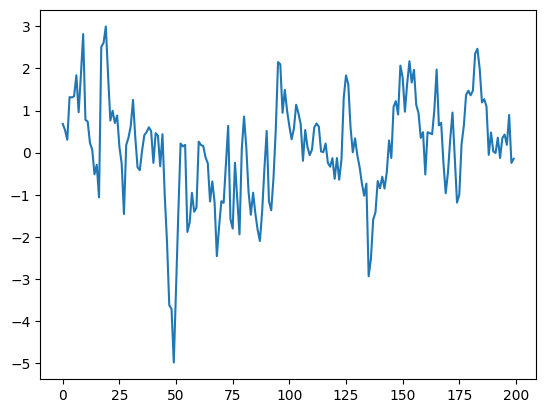

200
200
200
200
SharpRatio: 0.3350620143801367
0.022999999999999923
300


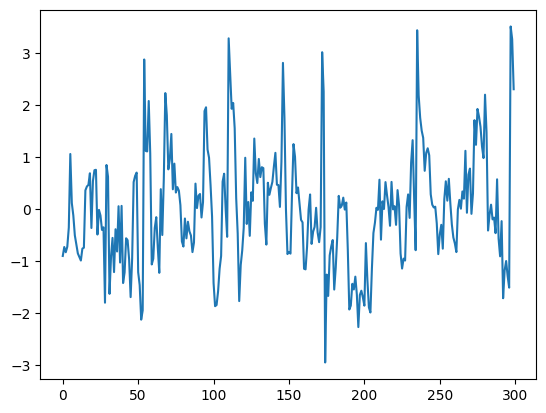

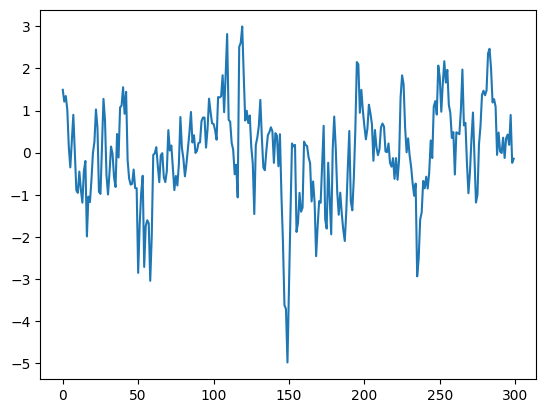

300
300
300
300
SharpRatio: 0.5238063118955879
0.04299999999999984
400


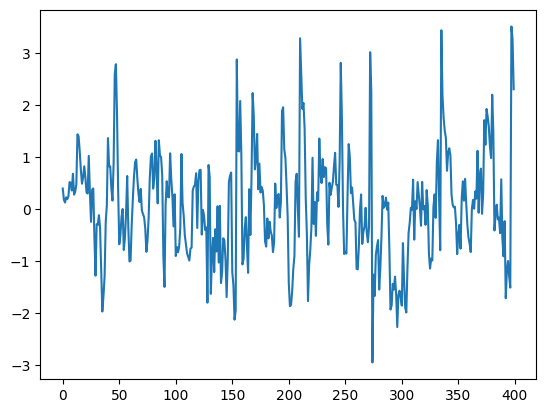

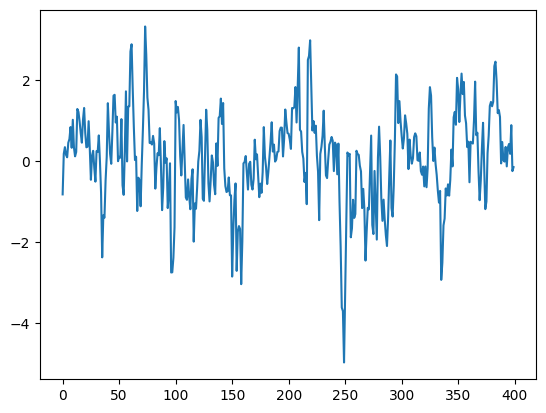

400
400
400
400
SharpRatio: 0.5238063118955879
0.04299999999999984
500


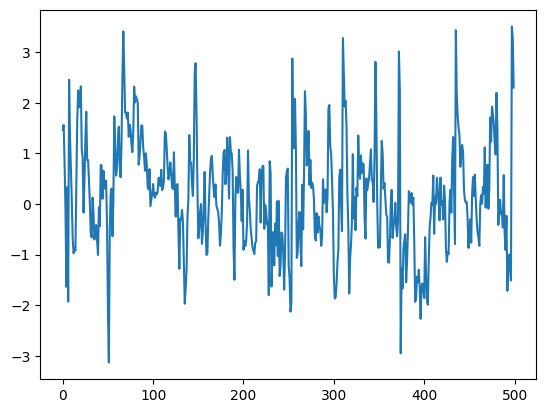

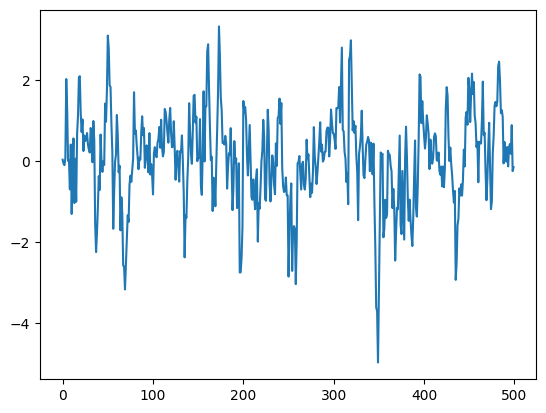

500
500
500
500
SharpRatio: 0.43254622458447595
0.06699999999999998
600


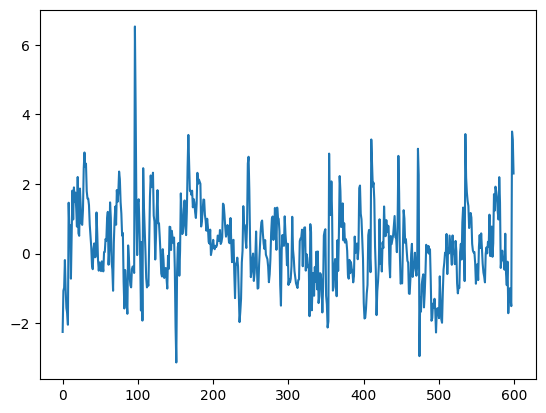

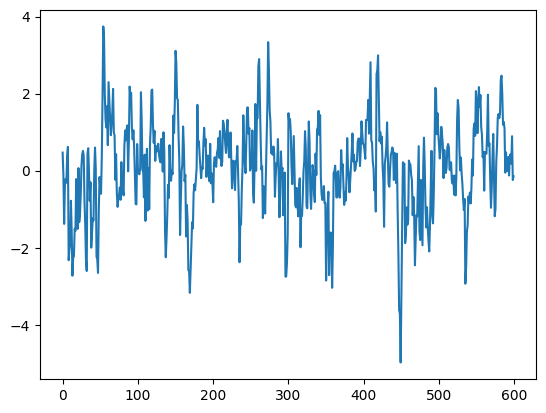

600
600
600
600
SharpRatio: 0.5814140136614444
0.10400000000000001
700


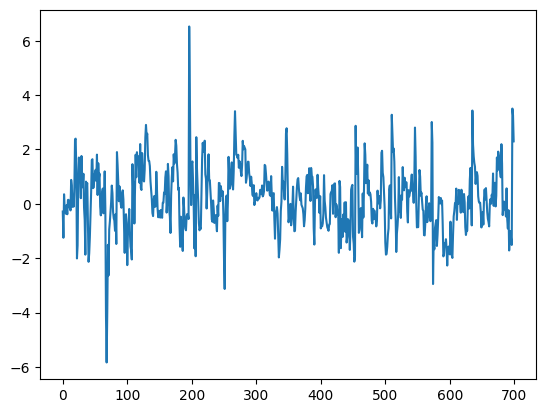

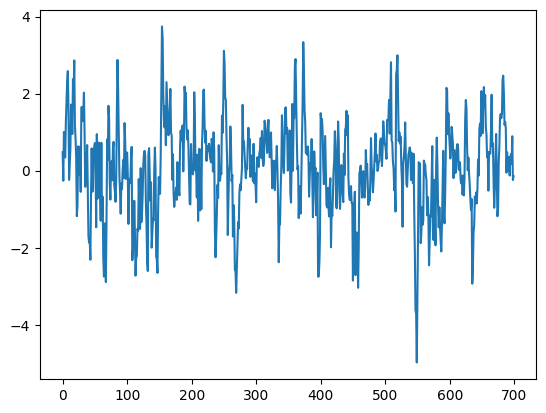

700
700
700
700
SharpRatio: 0.5814140136614444
0.10400000000000001


In [ ]:
#閲値2ver
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing

term_flag = 3
magic_num = 90

X_array = X_df.to_numpy()
y_array = y_df.to_numpy()
X_array2 = X_df2.to_numpy()
y_array2 = y_df2.to_numpy()
#print(X_array)
#print(y_array)

for i in range(1,8):

  total_num = 100*i
  print(total_num)

  s_list = []
  coef_list = []
  total_list = []
  res_list = []
  res_list2 = []
  return_list = []
  return_list2 = []
  result_list = []


  for j in range(total_num):
    total_list.append(list(X_array[len(X_df)-1-j]))
  #print(len(total_list))

  for i in range(magic_num-1,len(X_array)):
    #print("i:",i)
    if i <= len(X_array)-1-total_num:
      continue
    #print("i:",i)
    #print(y_log[len(y_log)-1])
    X_return_list = []
    y_return_list = []
    X_return_list2 = []
    y_return_list2 = []

    for j in range(magic_num):
      X_return_list.append(list(X_array[i-j]))
      y_return_list.append(y_array[i-j])
      X_return_list2.append(list(X_array2[i-j]))
      y_return_list2.append(y_array2[i-j])

    X_test = X_array[i].reshape(1, -1)
    #print(X_test)
    y_test = y_array[i]
    #print(X_pred)
    X_list2 = list(reversed(X_return_list))
    y_list2 = list(reversed(y_return_list))
    X_list2_2 = list(reversed(X_return_list2))
    y_list2_2 = list(reversed(y_return_list2))
    #print("X_list:",X_list2)
    #print("y_list:",y_list2)

    PLS_model = PLSRegression(n_components=7)

    PLS_model.fit(X_list2, y_list2)
    #X_pred = PLS_model.predict(X_test)
    #res_score = y_test - X_pred
    #res_list.append(res_score)
    #ss = preprocessing.StandardScaler()
    #res_std_list = ss.fit_transform(res_list)

    X_pred = PLS_model.predict(X_list2)
    res_score = y_list2 - X_pred
    res_score = res_score.reshape(-1, 1)

    #print(res_score)
    ss = preprocessing.StandardScaler()
    res_score_std_list = ss.fit_transform(res_score)
    res_list.append(res_score_std_list[len(res_score_std_list)-1])
    return_list.append(y_list2[len(y_list2)-1])
#モデル二つ目の部分
    PLS_model = PLSRegression(n_components=7)

    PLS_model.fit(X_list2_2, y_list2_2)
    #X_pred = PLS_model.predict(X_test)
    #res_score = y_test - X_pred
    #res_list.append(res_score)
    #ss = preprocessing.StandardScaler()
    #res_std_list = ss.fit_transform(res_list)

    X_pred_2 = PLS_model.predict(X_list2_2)
    res_score_2 = y_list2_2 - X_pred_2
    res_score_2 = res_score_2.reshape(-1, 1)

    #print(res_score)
    ss = preprocessing.StandardScaler()
    res_score_std_list_2 = ss.fit_transform(res_score_2)
    res_list2.append(res_score_std_list_2[len(res_score_std_list_2)-1])
    return_list2.append(y_list2_2[len(y_list2_2)-1])



  plt.plot(res_list)
  plt.show()
  plt.plot(res_list2)
  plt.show()
  print(len(res_list))
  print(len(return_list))
  print(len(res_list2))
  print(len(return_list2))

  open_flag = 0
  open_data = 0
  close_data = 0
  open_flag2 = 0
  open_data2 = 0
  close_data2 = 0
  for j in range(len(return_list)):
    res_score = res_list[j]
    return_ = return_list[j]
    res_score2 = res_list2[j]
    return_2 = return_list2[j]
    #print(res_score)
    #print(return_)


    if open_flag == -1 and open_flag2 == 1 :
      if res_score<=0 or res_score2>0:#変えるパラメータ
        close_data = return_
        close_data2 = return_2
        result_return = (close_data - open_data)*open_flag+(close_data2 - open_data2)*open_flag2-0.005
        result_list.append(result_return)
        open_flag = 0
        open_flag2 = 0
    if open_flag == 1 and open_flag2 == -1 :
      if res_score>0 or res_score2<=0:#変えるパラメータ
        close_data = return_
        close_data2 = return_2
        result_return = (close_data - open_data)*open_flag+(close_data2 - open_data2)*open_flag2-0.005
        result_list.append(result_return)
        open_flag = 0
        open_flag2 = 0

    if res_score>2.0or res_score<-2.0:#変えるパラメータ
      if res_score2>2.0 or res_score2<-2.0:
        if res_score>0 and res_score2<=0:
          if open_flag == 0 and open_flag2 == 0 :
            open_flag = -1
            open_flag2 = 1
            open_data = return_
            open_data2 = return_2
        if res_score<=0 and res_score2>0:
          if open_flag == 0 and open_flag2 == 0 :
            open_flag = 1
            open_flag2 = -1
            open_data = return_
            open_data2 = return_2

  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)

100


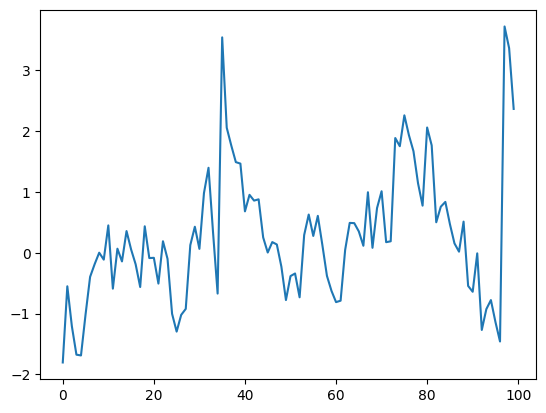

100
100
SharpRatio: 1.0
0.03299999999999992
200


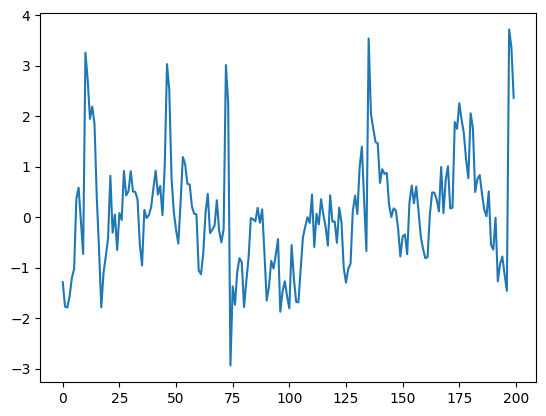

200
200
SharpRatio: 0.3688385861115339
0.06199999999999972
300


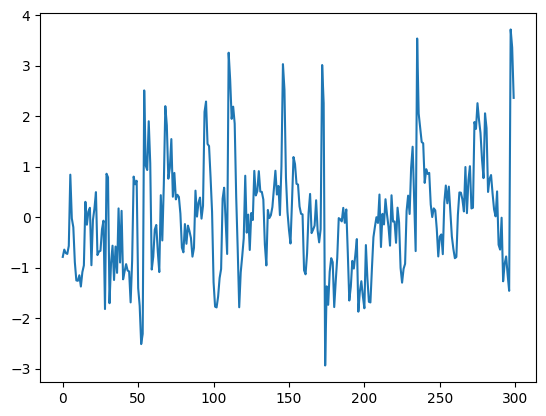

300
300
SharpRatio: 0.1831451974006704
0.054999999999999716
400


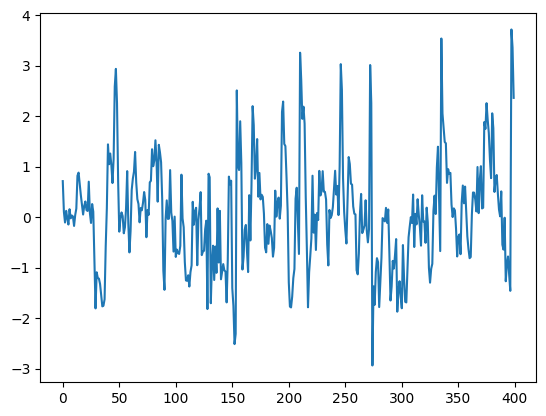

400
400
SharpRatio: 0.21827793633471668
0.06899999999999973
500


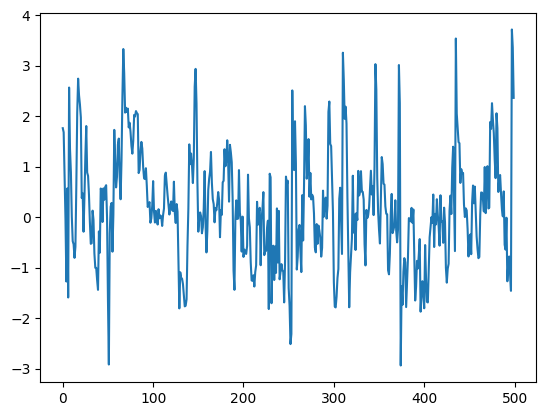

500
500
SharpRatio: 0.05542249011192251
0.028999999999999693
600


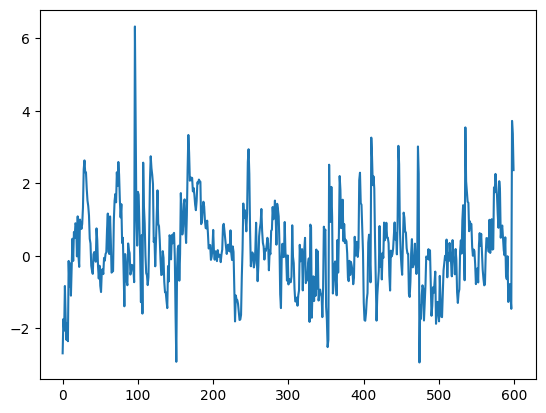

600
600
SharpRatio: -0.046493348209232135
-0.029000000000000276
700


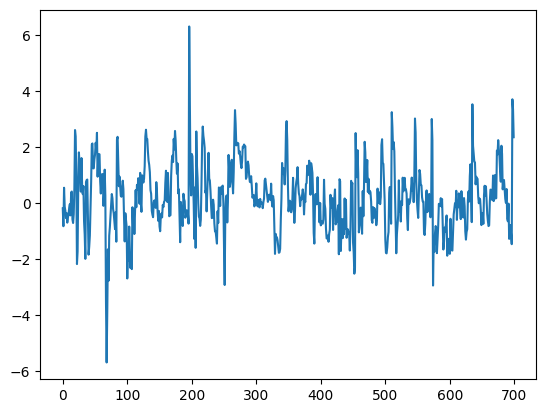

700
700
SharpRatio: -0.10985363514645559
-0.08000000000000032


In [ ]:
#ポジション入れ替えバージョン
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing

term_flag = 3
magic_num = 90

X_array = X_df.to_numpy()
y_array = y_df.to_numpy()
#print(X_array)
#print(y_array)

for i in range(1,8):

  total_num = 100*i
  print(total_num)

  s_list = []
  coef_list = []
  total_list = []
  res_list = []
  return_list = []
  result_list = []


  for j in range(total_num):
    total_list.append(list(X_array[len(X_df)-1-j]))
  #print(len(total_list))

  for i in range(magic_num-1,len(X_array)):
    #print("i:",i)
    if i <= len(X_array)-1-total_num:
      continue
    #print("i:",i)
    #print(y_log[len(y_log)-1])
    X_return_list = []
    y_return_list = []

    for j in range(magic_num):
      X_return_list.append(list(X_array[i-j]))
      y_return_list.append(y_array[i-j])

    X_test = X_array[i].reshape(1, -1)
    #print(X_test)
    y_test = y_array[i]
    #print(X_pred)
    X_list2 = list(reversed(X_return_list))
    y_list2 = list(reversed(y_return_list))
    #print("X_list:",X_list2)
    #print("y_list:",y_list2)

    PLS_model = PLSRegression(n_components=4)

    PLS_model.fit(X_list2, y_list2)
    #X_pred = PLS_model.predict(X_test)
    #res_score = y_test - X_pred
    #res_list.append(res_score)
    #ss = preprocessing.StandardScaler()
    #res_std_list = ss.fit_transform(res_list)

    X_pred = PLS_model.predict(X_list2)
    res_score = y_list2 - X_pred
    res_score = res_score.reshape(-1, 1)

    #print(res_score)
    ss = preprocessing.StandardScaler()
    res_score_std_list = ss.fit_transform(res_score)
    res_list.append(res_score_std_list[len(res_score_std_list)-1])
    return_list.append(y_list2[len(y_list2)-1])



  plt.plot(res_list)
  plt.show()
  print(len(res_list))
  print(len(return_list))

  open_flag = 0
  open_data = 0
  close_data = 0
  for j in range(len(return_list)):
    res_score = res_list[j]
    return_ = return_list[j]
    #print(res_score)
    #print(return_)


    if open_flag == 1:
      if res_score<=0:#変えるパラメータ
        close_data = return_
        result_return = (close_data - open_data)*open_flag
        result_list.append(result_return)
        open_flag = 0
    if open_flag == -1:
      if res_score>0:#変えるパラメータ
        close_data = return_
        result_return = (close_data - open_data)*open_flag
        result_list.append(result_return)
        open_flag = 0

    if res_score>2.0 or res_score<-2.0:#変えるパラメータ
      if res_score>0:
        open_flag = 1
        open_data = return_
      if res_score<=0:
        open_flag = -1
        open_data = return_

  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)


In [ ]:


    #print(return_list)
    for j in range(len(df_1.columns)):
      if j != term_flag:
        continue
      if j == 2:
        continue
      else:
        R_list1 = [r[j] for r in return_list]
        R_fut_list = [r[2] for r in return_list]
        R_list1 = np.array(R_list1).reshape(-1, 1)
        R_fut_list = np.array(R_fut_list).reshape(-1, 1)

        total_list1 = [r[j] for r in total_list]
        total_fut_list = [r[2] for r in total_list]
        total_list1 = np.array(total_list1).reshape(-1, 1)
        total_fut_list = np.array(total_fut_list).reshape(-1, 1)

        #print(R_list1)
        #print("return_1:",R_list1[0])
        #print("return_fut:",R_fut_list[0])
        #print(R_fut_list)
        lr = LinearRegression()
        lr.fit(R_fut_list, R_list1)
        #lr.fit(total_fut_list, total_list1)

        coefficient = lr.coef_[0,0]
        #print("cof",coefficient)
        coef_list.append(coefficient)
        intercept = lr.intercept_[0]
        #print(intercept)

        res_list = []
        for l in range(magic_num):
          residual = list(R_list1[l] - intercept - coefficient*R_fut_list[l])
          #residual = list(R_list1[l] - R_fut_list[l])
          res_list.append(residual)
        res_list = np.ravel(np.array(res_list))
        #print(res_list)
        X_list = []
        for l in range(len(res_list)):
          res_list_sub = res_list[l:len(res_list)]
          X_t = sum(res_list_sub)
          X_list.append(X_t)
        #print(X_list)
        X_list2 = list(reversed(X_list))
        #print(X_list2)
        ar_model = statsmodels.tsa.ar_model.AutoReg(X_list2,lags=1)
        ar_res = ar_model.fit()

        a = ar_res.params[0]
        #print(a)
        b = ar_res.params[1]
        #print(b)
        var = ar_res.sigma2
        #print(var)

        s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
        #s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))
        #print("S_score:",s)
        s_list.append(s)




  plt.plot(s_list)
  plt.show()

  r_list = []
  R_sum2 =0
  for i in range(len(s_list)-3):
    #print("i:",i+len(y_log)-total_num)
    s = s_list[i]
    coefficient= coef_list[i]
    coefficient_2= coef_list[i+1]
    coefficient_3= coef_list[i+2]
    coefficient= float(format(coefficient, '.1f'))
    return_ = 0
    return_2 = 0
    return_sum = 0
    if s>1.0 or s<-1.0:
      #print("i:",i+len(y_log)-total_num)
      #print("s:",s)
      #print("coef:",coefficient)
      if s>0:
        r1_flag = -1
        fut_flag = 1
      if s<0:
        r1_flag = 1
        fut_flag = -1
      t_i = i+len(y_log)-total_num
      r2_list = list(y_log[t_i+1])
      r2 = r2_list[term_flag]
      r_fut = r2_list[2]
      r3_list = list(y_log[t_i+2])
      r3 = r3_list[term_flag]
      r3_fut = r3_list[2]
      r4_list = list(y_log[t_i+3])
      r4 = r4_list[term_flag]
      r4_fut = r4_list[2]
      return_ = r2*r1_flag + r_fut*fut_flag*coefficient
      #return_ = r2*r1_flag + r_fut*fut_flag
      return_2 = r3*r1_flag + r3_fut*fut_flag*coefficient
      return_3 = r4*r1_flag + r4_fut*fut_flag*coefficient
      #return_2 = r3*r1_flag + r3_fut*fut_flag
      return_sum = return_ + return_2 +return_3-0.00
      #return_sum = return_  -0.001
      R_sum2 = R_sum2 + return_sum
      #return_ = r2*r1_flag + r_fut*fut_flag
      if -100 < return_<100 :
        r_list.append(return_sum)
        #print(r2_list)
        #print(r2)
        #print(r_fut)
        #print(r3_list)
        #print(r3)
        #print(r3_fut)
        #print("b_1",coefficient_2)
        #print("b_2",coefficient_3)
        #print(return_)
      #while t_i+1 < len(s_list)-1:
        #r2_list = list(y_log[t_i])
        #r2 = r2_list[j]
  R_sum = sum(r_list)
  SR = np.mean(np.array(r_list))/np.std(np.array(r_list))
  print("SharpRatio:",SR)
  print(R_sum)
  print(R_sum2)

IndentationError: expected an indented block after 'for' statement on line 70 (<ipython-input-44-e6a378949d6a>, line 72)